# CS 345 Final Project


Done by Caedon Ott

This project is divided into five sections. They are:

*   Introduction/Setup
*   Load the dataset
*   Setup ML Models
*   Execute Models and Summarize Performance
*   Conclusion/ Analysis





# Introduction/ Setup


First, we need to import all necessary classes.

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import default_rng
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree

%matplotlib inline

# Load the dataset

Now, to import the Wine Classification Dataset.

In [ ]:
from sklearn import datasets
wine = datasets.load_wine()
all_features = [0,1,2,3,4,5,6,7,8,9,10,11,12]
X = wine.data[:,all_features]
y = wine.target


Lets get a quick visual of our data to see what we are working with.

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
wine = pd.DataFrame(data=wine['data'],columns=wine['feature_names'])
print(wine.head())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

# Setup ML Models

The wine classification dataset has three distinct classes that determine where the wine was cultivated. There are 13 different measurements that contribute to the classification. I will be using three different approaches to predict where the wine was cultivated.

1.   Linear Regression
2.   Decision Tree
3.   kNN



# Linear Regression

In [ ]:
def gen_reg_problem(x, sample_n = 178, mw = 3, mb = 3, sigma = 10, rseed = 42):
  rng = default_rng(seed = rseed)
  y_1 = mw*x + mb
  ylst = y_1 + (rng.standard_normal(sample_n) * sigma)
  return y_1, ylst

In [ ]:
def run_regression_1D_on_single_example(x,y_lst):
  model = LinearRegression()
  model.fit(x[:, np.newaxis], y_lst)
  w = ( len(x) * np.sum(x*y_lst) - np.sum(x) * np.sum(y_lst)) / (len(x)*np.sum(x*x) - np.sum(x) ** 2)
  b = (np.sum(y_lst) - w *np.sum(x)) / len(x)
  model_w = np.round(w,3)
  model_b = np.round(b,3)
  y_pred_lst = model.predict(x[:,np.newaxis])
  mse = np.square(np.subtract(y_lst,y_pred_lst)).mean()
  rmse = math.sqrt(mse)
  rmse = np.round(rmse,3)
  r2 = np.round(r2_score(y_true=y_lst,y_pred=y_pred_lst),3)
  return model_w, model_b, y_pred_lst, rmse, r2

# Decision Tree

In [ ]:
def setup_decision_tree(X,y,max_depth=2, random_state = 42):
  tree = DecisionTreeClassifier(max_depth = max_depth, random_state = random_state)
  tree.fit(X,y)
  return tree

# kNN

In [ ]:
class nearest_neighbor:
    def __init__(self):
        pass
    def fit(self, X, y):
        self.X = X
        self.y = y
    def get_nearest(self, q):
        nn = np.argmin(np.linalg.norm(self.X - q,axis=1))
        return nn
    def predict(self, q) :
        return self.y[self.get_nearest(q)]

In [ ]:
def setup_knn(X_train,y_train,X_test,y_test):
  nn = nearest_neighbor()
  nn.fit(X_train, y_train)
  y_pred = np.array([nn.predict(X_test[i]) for i in range(len(X_test))])
  acc = np.sum(y_pred == y_test)/len(y_test)
  return y_pred, acc

Now, we have a Nearest Neighbors algorithm and a way to utilize it on a dataset.

# Execute Models and Summarize performance

# 1D Regression on Alcohol

Alright, now on to the fun stuff! Lets start with generating a one dimensional regression problem based on the alcohol values. 


In [ ]:
wine = datasets.load_wine()
feature_1 = [0]
X_1 = wine.data[:,feature_1]
X_1 = X_1.flatten()
y1, ylst1 = gen_reg_problem(X_1)
mods_w1, mods_b1, yp1, rmse1, r21 = run_regression_1D_on_single_example(X_1, ylst1)
print(f'coefficients values: mw is {mods_w1}, mb is {mods_b1}')
print(f'rmse value is {rmse1}, r2 value is {r21}')



coefficients values: mw is 4.369, mb is -15.378
rmse value is 8.623, r2 value is 0.144


Let's plot our points to get a visual.

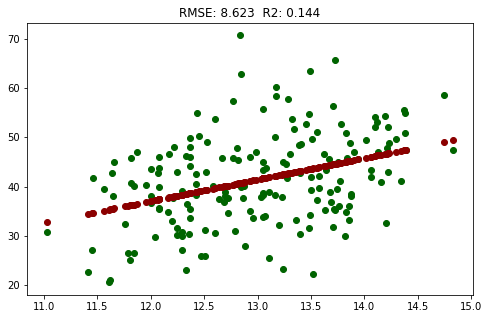

In [ ]:
def plot_reg(x, y_noise, yp,  rmse, r2) :
    fig, ax = plt.subplots(figsize=(8,5))
    #ax.set_ylim(bottom=y_low,top=y_high)
    ax.scatter(x,y_noise,color='darkgreen')
    ax.scatter(x,yp,color='darkred')
    ax.set_title('RMSE: ' + str(rmse) + ' ' + ' ' + 'R2: ' + str(r2))


plot_reg(X_1, ylst1, yp1, rmse1, r21)

As expected, there should be a low R^2 value as the values should belong to three different classes. However, looking at the predicted regression line I do not notice any significant relation to the data. It is likely that alcohol by itself is not a useful indicator of where the wine came from. Having said this, linear regression likely will not yield significant results as the samples are not seperated by class in any of the categories. I will run another 1D regression to see if the results are similar. 

# 1D Regression on Proline

In [ ]:
wine = datasets.load_wine()
feature_1 = [12]
X_2 = wine.data[:,feature_1]
X_2 = X_2.flatten()
y2, ylst2 = gen_reg_problem(X_1)
mods_w2, mods_b2, yp2, rmse2, r22 = run_regression_1D_on_single_example(X_2, ylst2)
print(f'coefficients values: mw is {mods_w2}, mb is {mods_b2}')
print(f'rmse value is {rmse2}, r2 value is {r22}')

coefficients values: mw is 0.007, mb is 35.857
rmse value is 9.022, r2 value is 0.063


Lets plot!

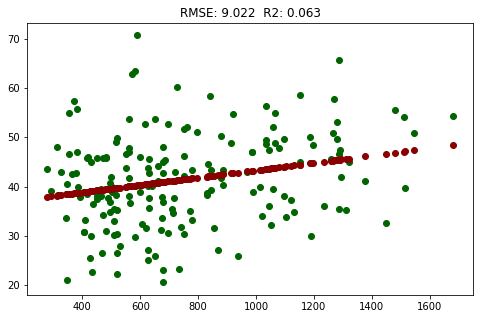

In [ ]:
plot_reg(X_2, ylst2, yp2, rmse2, r22)

I picked the proline category as it has the highest numbers, and therefore would show greater differences in variablity. Like the first regression, a low R^2 value is expected. The predicted regression line does nothing to predict class differences. It does however create a line of best fit based on the data from all three classes. Points closer to the line are likely the values that are more difficult to predict. 

# Decision Tree

Let's start by creating the tree. For the first decision tree, we will use 4 of the features, and allow the function to use the default depth of 2.

In [ ]:
first_four = [0,1,2,3]
X_4 = wine.data[:,first_four]
y_4 = wine.target
d_t = setup_decision_tree(X_4,y_4)

Now, let's see how well the decision tree did in predicting classes.

In [ ]:
print(f'Training Set Accuracy is: {d_t.score(X_4,y_4):2.3f}')

Training Set Accuracy is: 0.820


For how easy that was to use, an 82 percent accuracy is pretty remarkable. Let's get a visual! I will be using the code shown in the decision tree module to display.

Decision Tree with four features and a max depth of 2


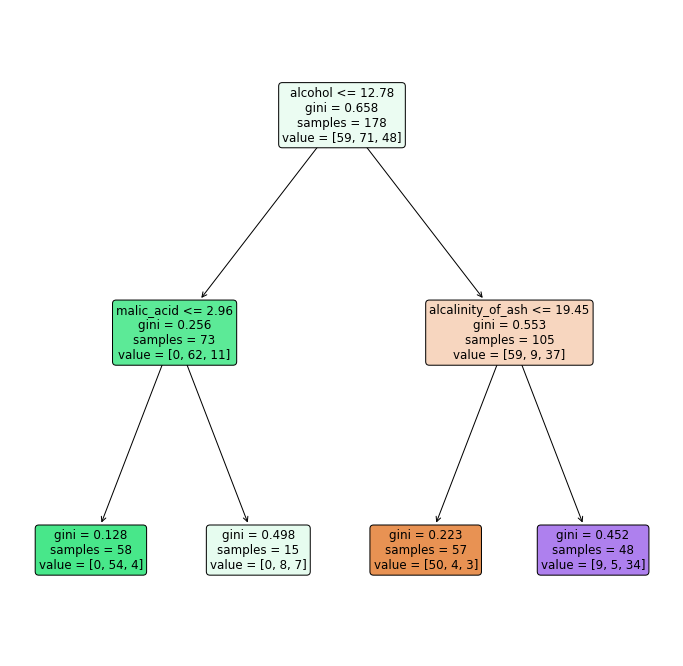

In [ ]:
plt.figure(figsize=(12,12))
fnames = np.array([wine['feature_names'][i] for i in features])
plot_tree(d_t, filled=True, rounded=True, feature_names=fnames)
print('Decision Tree with four features and a max depth of 2')

Next, lets try increasing the max depth by 1, while holding the number of features constant.

In [ ]:
d_t = setup_decision_tree(X_4,y_4, max_depth=3)

Let's see how much better the performance got with a max depth increase of 1.

In [ ]:
print(f'Training Set Accuracy is: {d_t.score(X_4,y_4):2.3f}')

Training Set Accuracy is: 0.888


By increasing the depth by 1, the Decision Tree gained 6.8 percent accuracy. Let's plot another visual.

Decision Tree with four features and a max depth of 3


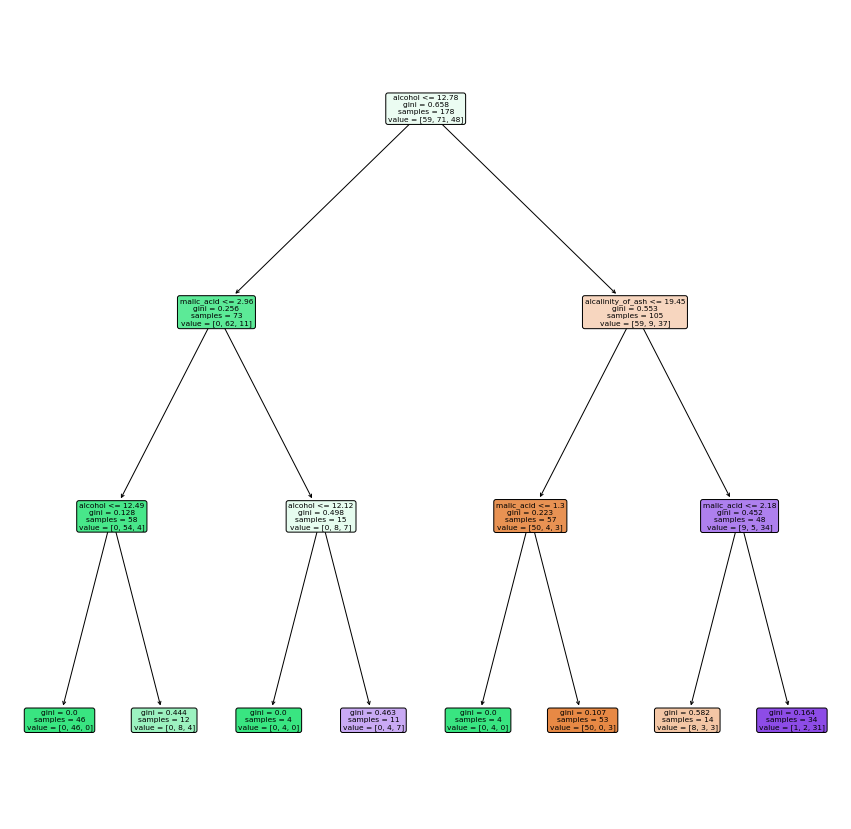

In [ ]:
plt.figure(figsize=(15,15))
fnames = np.array([wine['feature_names'][i] for i in features])
plot_tree(d_t, filled=True, rounded=True, feature_names=fnames)
print('Decision Tree with four features and a max depth of 3')

Next, let's try by using all of the features with a max depth of 2.

In [ ]:
d_t = setup_decision_tree(X,y)

Let's see how much better the performance got with using all of the features with a max depth of 2.

In [ ]:
print(f'Training Set Accuracy is: {d_t.score(X,y):2.3f}')

Training Set Accuracy is: 0.921


Wow! By using all of the features, there was a 10.1 percent increase compared to the first decision tree. Let's get another visual.

Decision Tree with all features and a max depth of 2


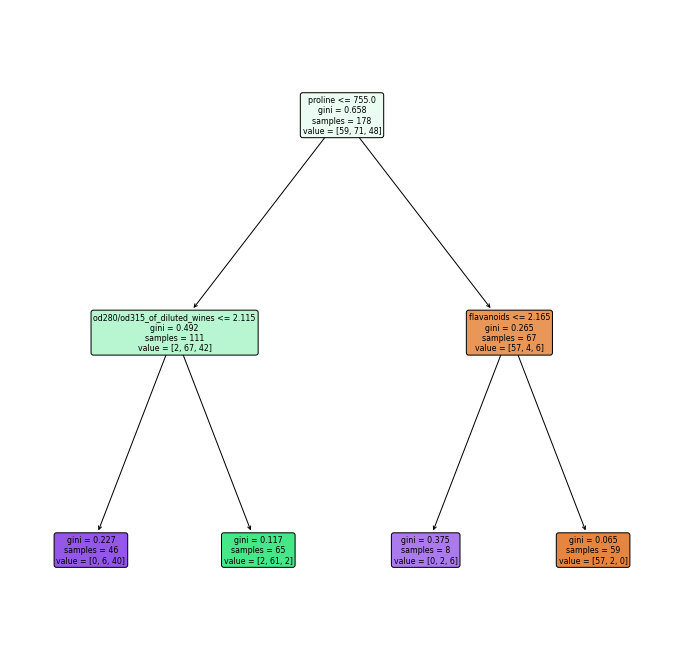

In [ ]:
plt.figure(figsize=(12,12))
fnames = np.array([wine['feature_names'][i] for i in features])
plot_tree(d_t, filled=True, rounded=True, feature_names=fnames)
print('Decision Tree with all features and a max depth of 2')

Finally, let's see what happens when all features are used, and the max depth is set to 3. 

In [ ]:
d_t = setup_decision_tree(X,y, max_depth=3)

Big performance incoming!

In [ ]:
print(f'Training Set Accuracy is: {d_t.score(X,y):2.3f}')

Training Set Accuracy is: 0.978


Using all features with a max depth of 3, the decision tree had a 97.8 percent accuracy. That is awfully impressive. Let's get a final visual to finish this section off.

Decision Tree with all features and a max depth of 3


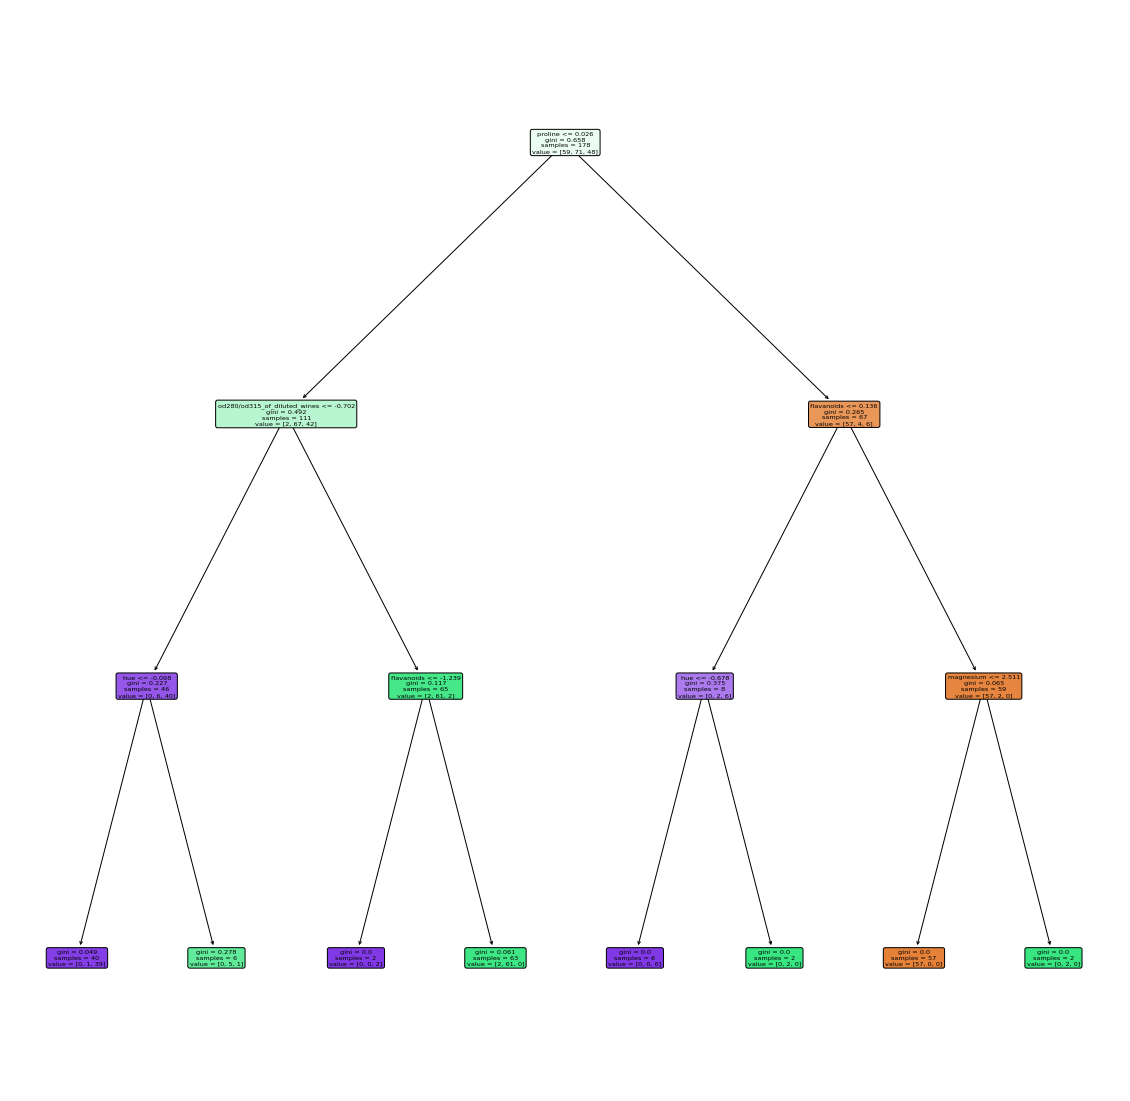

In [ ]:
plt.figure(figsize=(20,20))
fnames = np.array([wine['feature_names'][i] for i in features])
plot_tree(d_t, filled=True, rounded=True, feature_names=fnames)
print('Decision Tree with all features and a max depth of 3')

# Nearest Neigbors

I expect nearest neighbors to be highly effective in predicting class. Lets start by splitting the data into training and test sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.5, shuffle = True, random_state=42)

Now, let's classify the data without any normalization.

In [ ]:
nn = nearest_neighbor()
nn.fit(X_train, y_train)
y_pred = np.array([nn.predict(X_test[i]) for i in range(len(X_test))])

How well did the nearest neighbor algorithm perform?

In [ ]:
acc = np.sum(y_pred == y_test)/len(y_test)
print(f'The accuracy is {acc:.3f}')

The accuracy is 0.685


Lets plot a visual. I am not very good at creating displays, so I will be modifying some code from https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py to display the dataset after nearest neighbors is applied.

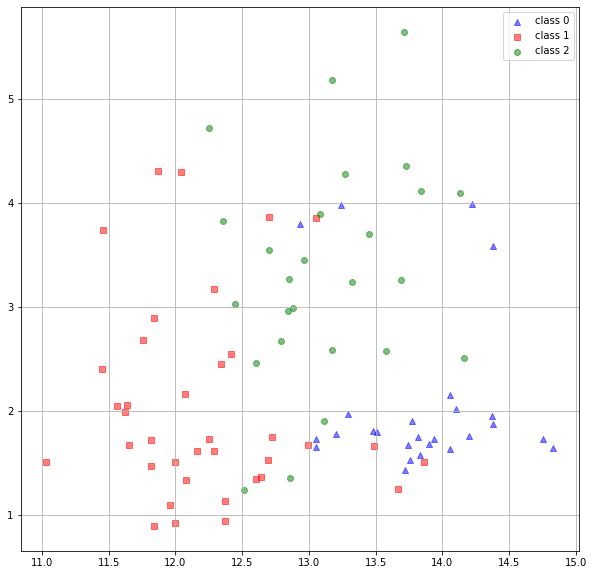

In [ ]:
def plot_nn():
  FIG_SIZE = (10,10)
  target_classes = range(0, 3)
  colors = ("blue", "red", "green")
  markers = ("^", "s", "o")
  fig, (ax) = plt.subplots(ncols=1, figsize=FIG_SIZE)

  for target_class, color, marker in zip(target_classes, colors, markers):
      ax.scatter(
          x=X_train[y_train == target_class, 0],
          y=X_train[y_train == target_class, 1],
          color=color,
          label=f"class {target_class}",
          alpha=0.5,
          marker=marker,
      )
  ax.legend(loc="upper right")
  ax.grid()

plot_nn()

As we can see, there are many instances where the classes are very close to eachother, which could help explain why the original accuracy was only 68.5 percent. Lets try the algorithm again with normalization. I will be using the normalization shown in assignment 03.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
mean = scaler.mean_
scale = scaler.scale_
X_norm = scaler.transform(X)

Now, let's run it again.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm,y,test_size = 0.5, shuffle = True, random_state=42)
nn = nearest_neighbor()
nn.fit(X_train, y_train)
y_pred = np.array([nn.predict(X_test[i]) for i in range(len(X_test))])

Let's see how it did!

In [ ]:
acc = np.sum(y_pred == y_test)/len(y_test)
print(f'The accuracy is {acc:.3f}')

The accuracy is 0.933


Yes! After normalizing the data, the nearest neighbors algorithm was able to predict with 93.3 percent accuracy. A large improvement over the previous 68.5 percent. Let's plot a quick visual

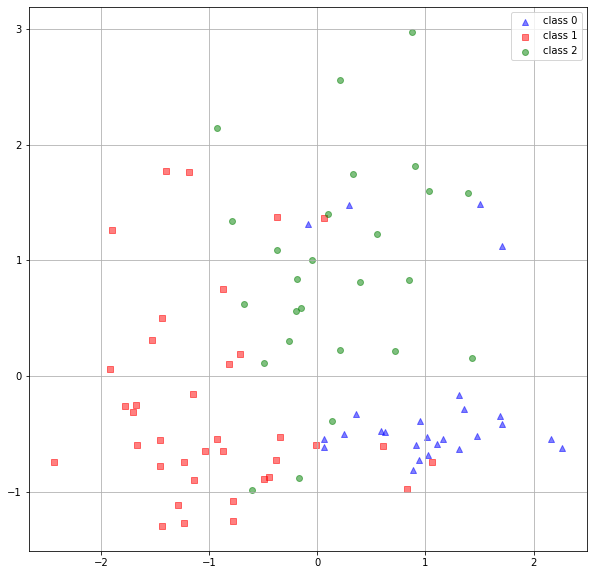

In [ ]:
plot_nn()

The visual looks largely the same, except for the axes have shrunk a bit.

# Conclusion and Analysis

The first approach, Linear Regression, was not useful in predicting class. The data is not differentiated by class and is all clustered together, meaning that the predicted regression line is a representation of the values that are most likely to belong to all three classes. These values would likely contribute to the prediction error. 



The second approach, Decision Tree, was the easiest and the most effective in predicting the classes. By increasing the amount of decisions the tree could make by just 1, the tree was able to see huge increases in performance. With a tool that is so accesible, and so easy to increase performance in, it would be hard not to use a decision tree on any problem where it is applicable.

Top performance:

In [ ]:
print(f'Best Decision Tree Accuracy: {d_t.score(X,y):2.3f}')

Best Decision Tree Accuracy: 0.978


The third approach, kNN, was the second most effective in predicting classes. With the first prediction, accuracy was decent. However, after normalization, there was nearly a 25 percent increase in performance which made the algorithm highly effective. The kNN approach fails to compete with the Decision tree here because of the max depth being able to increase, which continuously increases the accuracy.

In [ ]:
print(f'Normalized kNN Accuracy: {acc:.3f}')

Normalized kNN Accuracy: 0.933


I use the term "class" a lot in this project, but what I am referring to in context of the data set is location in Italy. If someone were to hand me a real set of wine data, and told me to determine where it came from, I would immediatley import it into a jupyter notebook and run a decision tree on it. 